<center><h1><b>5주차 ✅ 생활 폐기물 위험지역 선정</b></h1></center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium as f
from folium.features import CustomIcon


------
#### 데이터 가져오기

In [25]:
# 전체 행정구역 인구수 데이터 가져오기
info_raw =pd.read_csv('output/info_1920.csv')
pop = info_raw[(info_raw['구역'] == '전체 행정구역') & (info_raw['항목'] == '인구 (명)')]
pop = pop.drop(columns=['구역', '항목'])
pop = pop.melt(id_vars=['시도명'], value_name='인구수').groupby('시도명', as_index=False).sum()
pop

,시도명,인구수
0,강원도,3120743
1,경기도,27428732
2,경상남도,6845536
3,경상북도,5411702
4,광주광역시,2951678
5,대구광역시,4914366
6,대전광역시,2974756
7,부산광역시,6892152
8,서울특별시,19904831
9,세종특별자치시,707182


In [27]:
# 전체 행정구역 면적 데이터 가져오기
area = info_raw[(info_raw['구역'] == '전체 행정구역') & (info_raw['항목'] == '면적 (km²)')]
area = area.drop(columns=['구역', '항목'])
area = area.melt(id_vars=['시도명'], value_name='면적(km²)').groupby('시도명', as_index=False).sum()
area

,시도명,면적(km²)
0,강원도,33751
1,경기도,20387
2,경상남도,21080
3,경상북도,38067
4,광주광역시,1002
5,대구광역시,1766
6,대전광역시,1078
7,부산광역시,1540
8,서울특별시,1210
9,세종특별자치시,928


In [53]:
# 생활 폐기물 발생량 데이터 가져오기
waste_raw = pd.read_csv('output/waste_ocr_1920.csv')
waste = waste_raw.melt(id_vars='시도명', value_name='폐기물발생량')
waste = waste.groupby('시도명', as_index=False).sum()
waste

,시도명,폐기물발생량
0,강원도,1348882
1,경기도,7385039
2,경상남도,2566968
3,경상북도,1767098
4,광주광역시,844132
5,대구광역시,1875332
6,대전광역시,967796
7,부산광역시,2225509
8,서울특별시,6337790
9,세종특별자치시,236625


In [43]:
# 매립소각량 데이터 가져오기
fire_land_raw = pd.read_csv('output/waste_prs_1920.csv')
fire_land = fire_land_raw[fire_land_raw['처리방식'].isin(['매립', '소각'])]
fire_land = fire_land.drop(columns=['처리업체', '처리방식'])
fire_land = fire_land.melt(id_vars=['시도명'], value_name='매립소각량')
fire_land = fire_land.groupby('시도명', as_index=False).sum()
fire_land


,시도명,매립소각량
0,강원도,704336.3
1,경기도,3410812.3
2,경상남도,1229261.5
3,경상북도,1092934.3
4,광주광역시,378722.4
5,대구광역시,591189.7
6,대전광역시,277352.8
7,부산광역시,390531.6
8,서울특별시,2287740.4
9,세종특별자치시,63262.1


In [57]:
# 2019-2020년 폐기물 발생량 차
waste_diff = waste_raw.copy()
waste_diff['폐기물발생량차'] = waste_diff['2020'] - waste_diff['2019']
waste_diff = waste_diff.drop(columns=['2019', '2020'])
waste_diff


,시도명,폐기물발생량차
0,강원도,-13516
1,경기도,417993
2,경상남도,-26576
3,경상북도,39116
4,광주광역시,-2814
5,대구광역시,766
6,대전광역시,28506
7,부산광역시,71279
8,서울특별시,17450
9,세종특별자치시,-843


In [74]:
# 모든 데이터 병합하기
df = pd.merge(pop, area)
df = pd.merge(df, fire_land)
df = pd.merge(df, waste)
df = pd.merge(df, waste_diff)
df

,시도명,인구수,면적(km²),매립소각량,폐기물발생량,폐기물발생량차
0,강원도,3120743,33751,704336.3,1348882,-13516
1,경기도,27428732,20387,3410812.3,7385039,417993
2,경상남도,6845536,21080,1229261.5,2566968,-26576
3,경상북도,5411702,38067,1092934.3,1767098,39116
4,광주광역시,2951678,1002,378722.4,844132,-2814
5,대구광역시,4914366,1766,591189.7,1875332,766
6,대전광역시,2974756,1078,277352.8,967796,28506
7,부산광역시,6892152,1540,390531.6,2225509,71279
8,서울특별시,19904831,1210,2287740.4,6337790,17450
9,세종특별자치시,707182,928,63262.1,236625,-843


In [75]:
df.to_csv('output/result.csv', index=False)

-----
#### min-max scaling

In [76]:
df = pd.read_csv('output/result.csv')
df.head()

,시도명,인구수,면적(km²),매립소각량,폐기물발생량,폐기물발생량차
0,강원도,3120743,33751,704336.3,1348882,-13516
1,경기도,27428732,20387,3410812.3,7385039,417993
2,경상남도,6845536,21080,1229261.5,2566968,-26576
3,경상북도,5411702,38067,1092934.3,1767098,39116
4,광주광역시,2951678,1002,378722.4,844132,-2814


In [77]:
df_ = df.set_index('시도명')
df_

,인구수,면적(km²),매립소각량,폐기물발생량,폐기물발생량차
시도명,,,,,
강원도,3120743,33751,704336.3,1348882,-13516
경기도,27428732,20387,3410812.3,7385039,417993
경상남도,6845536,21080,1229261.5,2566968,-26576
경상북도,5411702,38067,1092934.3,1767098,39116
광주광역시,2951678,1002,378722.4,844132,-2814
대구광역시,4914366,1766,591189.7,1875332,766
대전광역시,2974756,1078,277352.8,967796,28506
부산광역시,6892152,1540,390531.6,2225509,71279
서울특별시,19904831,1210,2287740.4,6337790,17450


In [61]:
def scale_minmax(df):
    # min-max 스케일링
    # 만약 많이 사용된다면 성능문제를 생각해서 변수 생성
    max_value = df.max()  # series 한 줄 짜리가 나온다. (vector)
    min_value = df.min()  # seriese 한 줄 짜리 (vector)
    extent = (max_value - min_value)

    scaled_df = (df - min_value) / extent  # 정상적인 값들은 minmax 가 되고
    column_to_keep = extent > 0 # 이 조건을 만족하는 것들은 keep
    return scaled_df.loc[:, column_to_keep]

27428732

In [80]:
df_ = scale_minmax(df_)
df_.sort_values(
    ['인구수', '폐기물발생량', '매립소각량', '면적(km²)', '폐기물발생량차'],
    ascending=[False, False, False, True, False])

,인구수,면적(km²),매립소각량,폐기물발생량,폐기물발생량차
시도명,,,,,
경기도,1.000000,0.523951,1.000000,1.000000,1.000000
서울특별시,0.718433,0.007593,0.664509,0.853499,0.176622
부산광역시,0.231460,0.016479,0.097764,0.278227,0.287276
경상남도,0.229715,0.542610,0.348314,0.325994,0.086120
인천광역시,0.199561,0.032257,0.173621,0.166997,0.209231
경상북도,0.176057,1.000000,0.307590,0.214100,0.221160
대구광역시,0.157445,0.022564,0.157706,0.229241,0.142325
충청남도,0.137446,0.419047,0.238393,0.190972,0.000000
전라남도,0.115287,0.639893,0.205144,0.145664,0.186277


In [101]:
df_['면적(km²)'] = -(df_['면적(km²)']) * 0.1
df_

,인구수,면적(km²),매립소각량,폐기물발생량,폐기물발생량차
시도명,,,,,
강원도,0.090323,-0.000840,0.191505,0.155595,0.112966
경기도,1.000000,-0.000498,1.000000,1.000000,1.000000
경상남도,0.229715,-0.000515,0.348314,0.325994,0.086120
경상북도,0.176057,-0.000950,0.307590,0.214100,0.221160
광주광역시,0.083996,-0.000002,0.094236,0.084985,0.134966
대구광역시,0.157445,-0.000021,0.157706,0.229241,0.142325
대전광역시,0.084859,-0.000004,0.063954,0.102284,0.199349
부산광역시,0.231460,-0.000016,0.097764,0.278227,0.287276
서울특별시,0.718433,-0.000007,0.664509,0.853499,0.176622


In [108]:
df_ = df_.sum(axis=1).to_frame(name='폐기물위험수치').sort_values('폐기물위험수치', ascending=False)
df_

,폐기물위험수치
시도명,
경기도,3.999502
서울특별시,2.413056
경상남도,0.989628
경상북도,0.917956
부산광역시,0.894711
인천광역시,0.749378
대구광역시,0.686696
전라남도,0.651765
전라북도,0.612904


In [109]:
df_.to_csv('output/danger_zone.csv')

----
#### 위험지역 시각화

In [2]:
danger = pd.read_csv('output/danger_zone.csv')
danger

,시도명,폐기물위험수치
0,경기도,3.999502
1,서울특별시,2.413056
2,경상남도,0.989628
3,경상북도,0.917956
4,부산광역시,0.894711
5,인천광역시,0.749378
6,대구광역시,0.686696
7,전라남도,0.651765
8,전라북도,0.612904
9,충청남도,0.566413


In [554]:
danger = danger.sort_values('폐기물위험수치', ascending=False)
danger_ = scale_minmax(danger.set_index('시도명')).reset_index()
danger_


,시도명,폐기물위험수치
0,경기도,1.000000
1,서울특별시,0.589055
2,경상남도,0.220338
3,경상북도,0.201772
4,부산광역시,0.195751
5,인천광역시,0.158105
6,대구광역시,0.141868
7,전라남도,0.132819
8,전라북도,0.122753
9,충청남도,0.110710


In [555]:
danger_gd = ['bad'] + [i+1 for i in reversed(range(5)) for _ in range(3)] + ['good']
rank = [i+1 for i in range(len(danger))]
danger_['폐기물위험지역등급'] = danger_gd
danger_['폐기물위험지역순위'] = rank
danger_ = danger_.set_index('시도명')
danger_


,폐기물위험수치,폐기물위험지역등급,폐기물위험지역순위
시도명,,,
경기도,1.000000,bad,1
서울특별시,0.589055,5,2
경상남도,0.220338,5,3
경상북도,0.201772,5,4
부산광역시,0.195751,4,5
인천광역시,0.158105,4,6
대구광역시,0.141868,4,7
전라남도,0.132819,3,8
전라북도,0.122753,3,9


In [ ]:
danger_.reset_index(drop=False).to_csv('output/danger_zone_final.csv', index=False)

In [18]:
danger_ = pd.read_csv('output/danger_zone_final.csv')
danger_ = danger_.set_index('시도명')
danger_


,폐기물위험수치,폐기물위험지역등급,폐기물위험지역순위
시도명,,,
경기도,1.000000,bad,1
서울특별시,0.589055,5,2
경상남도,0.220338,5,3
경상북도,0.201772,5,4
부산광역시,0.195751,4,5
인천광역시,0.158105,4,6
대구광역시,0.141868,4,7
전라남도,0.132819,3,8
전라북도,0.122753,3,9


In [26]:
danger_color = {
    'bad': '#ef553b',
    '5': '#ef553b',
    '4': '#ff7f0f',
    '3': '#fecb52',
    '2': '#00cc96',
    '1':'#18becf',
    'good': '#18becf'
}

In [5]:
import json

state_geo = '../../3주차/data/TL_SCCO_CTPRVN.json'
state_geo

with open(state_geo, encoding='utf-8') as file:
    sido_map = json.load(file)

sido_map['features'][0]['properties']['CTP_KOR_NM']

'강원도'

In [6]:
locs = {
    '경기도': (37.95, 126.95),
    '서울특별시': (37.58, 126.7),
    '부산광역시': (35.198362, 129.053922),
    '경상북도':  (36.63, 128.46),
    '경상남도': (35.5, 128),
    '인천광역시':  (37.5, 125.8),
    '대구광역시': (35.96, 128.32),
    '충청남도': (36.69, 126),
    '전라남도':  (34.819400, 126.893113),
    '전라북도':  (35.86, 126.85),
    '대전광역시':   (36.321655, 127.378953),
    '강원도': (37.88, 128),
    '광주광역시': (35.28, 126.49),
    '울산광역시': (35.8, 129.5),
    '충청북도': (37.19, 127.50),
    '세종특별자치시':    (36.7, 127.07),
    '제주특별자치도':   (33.62, 126.11),
}


In [7]:
locs_center = {
    '경기도': (37.3604316949031, 127.51196478764179),
    '서울특별시': (37.56682335885089, 126.97440761286845),
    '부산광역시': (35.164982877010615, 128.99259593632902),
    '경상북도':  (36.289410550148375, 128.8584036201457),
    '경상남도': (35.34828424736677, 128.17368422952208),
    '인천광역시':  (37.47607428669355, 126.56636154800225),
    '대구광역시': (35.814911654999804, 128.56688361070604),
    '충청남도': (36.41802248658698, 126.81484684263197),
    '전라남도':  (34.65474179520874, 126.64859883223278),
    '전라북도':  (35.6762685099596, 127.09661909170836),
    '대전광역시':   (36.36207178164381, 127.38269664482169),
    '강원도': (37.68388172540258, 128.32967660739357),
    '광주광역시': (35.099725344140575, 126.83742531770025),
    '울산광역시': (35.57337156074819, 129.25113145401787),
    '충청북도': (36.7478780111142, 127.75152203320138),
    '세종특별자치시':    (36.639265087573854, 127.24666087561296),
    '제주특별자치도':   (33.39538246551929, 126.52717583906214),
}

In [21]:
danger_.loc['제주특별자치도', '폐기물위험지역등급']


'1'

In [27]:
danger_color[danger_.loc['제주특별자치도', '폐기물위험지역등급']]


'#18becf'


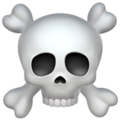
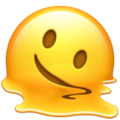
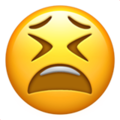
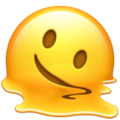
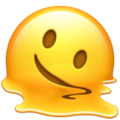
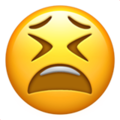
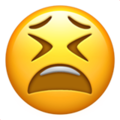
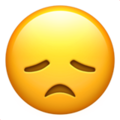
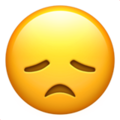
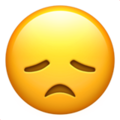
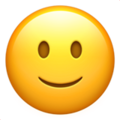
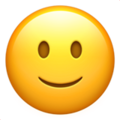
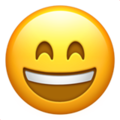
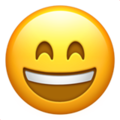
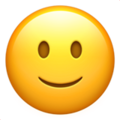
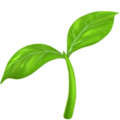
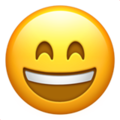

In [33]:
m = f.Map(location=[36.3, 128.071503], zoom_start=7, tiles='cartodbpositron',)


f.Choropleth(
    geo_data=sido_map,
    name="폐기물 위험 수치",
    data=danger_.reset_index(),
    columns=['시도명', '폐기물위험수치'],
    key_on="feature.properties.CTP_KOR_NM",
    fill_color="Spectral_r",
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name="폐기물 위험 수치",
    highlight=True
).add_to(m)


for k, v in locs_center.items():
    icon_image = 'data/icon/' + \
        str(danger_.loc[k, '폐기물위험지역등급']) + '.png'
    icon = CustomIcon(
        icon_image,
        icon_size=(30, 30),
        icon_anchor=(15, 15),
        popup_anchor=(30/2, 0)
    )
    marker = f.map.Marker(
        location=[v[0], v[1]],
        icon=icon,
        tooltip=
            '<div>'
            + '<center style="font-size: 1.5rem;color:'
            + str(danger_color[danger_.loc[k, '폐기물위험지역등급']])
            + '"><b>'
            + k
            + '</b></center>'
            + '<div style="border:1px solid black;\
                           background-color:#e2e2e2;\
                           padding:3px;\
                           color:black;\
                           ">'
            + '폐기물위험지역등급: '
            + str(danger_.loc[k, '폐기물위험지역등급'])
            + '등급'
            + '<br/>'
            + '폐기물위험수치: '
            + str(round(danger_.loc[k, '폐기물위험수치'], 3))
            + '<br/>'
            + '순위: '
            + str(danger_.loc[k, '폐기물위험지역순위'])
            + '위'
            + '</div>'
            + '</center>'
            + '</div>'
    )
    m.add_child(marker)


f.LayerControl().add_to(m)
m

In [410]:
icon_list = ['skull'] + [i+1 for i in range(5) for _ in range(3)] + ['good']
icon_idx = 0
for k, v in locs_center.items():
    icon_image = f'data/icon/{icon_list[icon_idx]}.png'
    icon_idx+=1
    print(icon_image)

data/icon/skull.png
data/icon/1.png
data/icon/1.png
data/icon/1.png
data/icon/2.png
data/icon/2.png
data/icon/2.png
data/icon/3.png
data/icon/3.png
data/icon/3.png
data/icon/4.png
data/icon/4.png
data/icon/4.png
data/icon/5.png
data/icon/5.png
data/icon/5.png
data/icon/good.png
